In [1]:


import numpy as np 
import pandas as pd 
import seaborn as sns

## Import Modules

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## LOAD THE DATASET

In [3]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk('/MainProject2.0/data/'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label=label.split('.')[0]
        labels.append(label.lower())
        
print("Dataset Loaded sucessfully")

Dataset Loaded sucessfully


In [4]:
paths[:5]

['/MainProject2.0/data/TESS Toronto emotional speech set data\\OAF_angry\\OAF_jail_angry.wav',
 '/MainProject2.0/data/TESS Toronto emotional speech set data\\OAF_angry\\OAF_jar_angry.wav',
 '/MainProject2.0/data/TESS Toronto emotional speech set data\\OAF_angry\\OAF_join_angry.wav',
 '/MainProject2.0/data/TESS Toronto emotional speech set data\\OAF_angry\\OAF_judge_angry.wav',
 '/MainProject2.0/data/TESS Toronto emotional speech set data\\OAF_angry\\OAF_jug_angry.wav']

In [5]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [6]:
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,/MainProject2.0/data/TESS Toronto emotional sp...,angry
1,/MainProject2.0/data/TESS Toronto emotional sp...,angry
2,/MainProject2.0/data/TESS Toronto emotional sp...,angry
3,/MainProject2.0/data/TESS Toronto emotional sp...,angry
4,/MainProject2.0/data/TESS Toronto emotional sp...,angry


In [7]:
df['label'].value_counts()

label
sad        384
fear       380
disgust    374
ps         370
neutral    363
happy      358
angry      334
Name: count, dtype: int64

## EXPLORATORY DATA ANALYSIS

<Axes: xlabel='label', ylabel='count'>

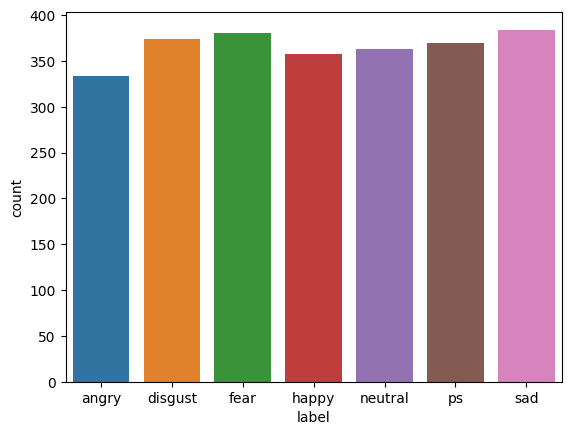

In [8]:
sns.countplot(x=df["label"])

In [9]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb =librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()
    

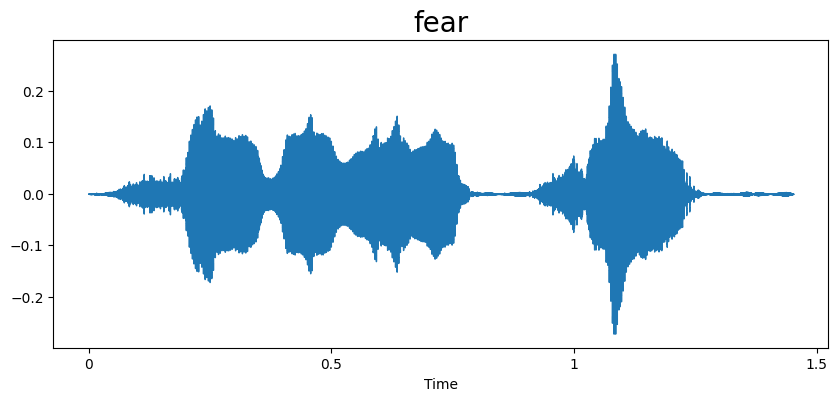

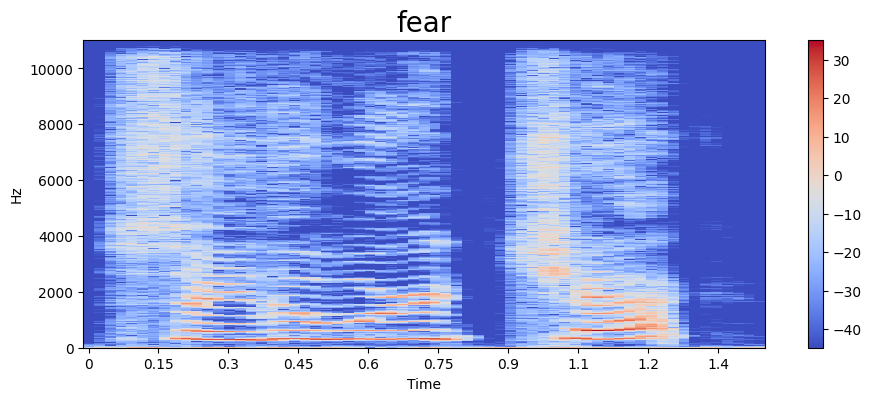

In [10]:
emotion='fear'
path=np.array (df['speech'][df['label']==emotion])[0]
data,sr = librosa.load(path)
waveplot(data,sr,emotion)
spectogram(data,sr,emotion)
Audio(path)

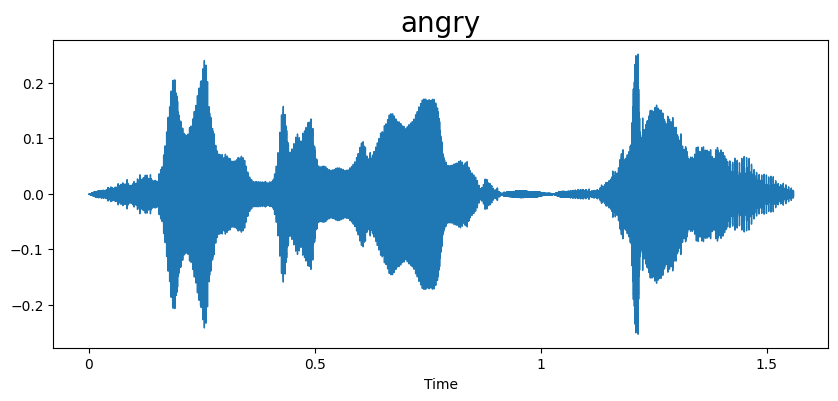

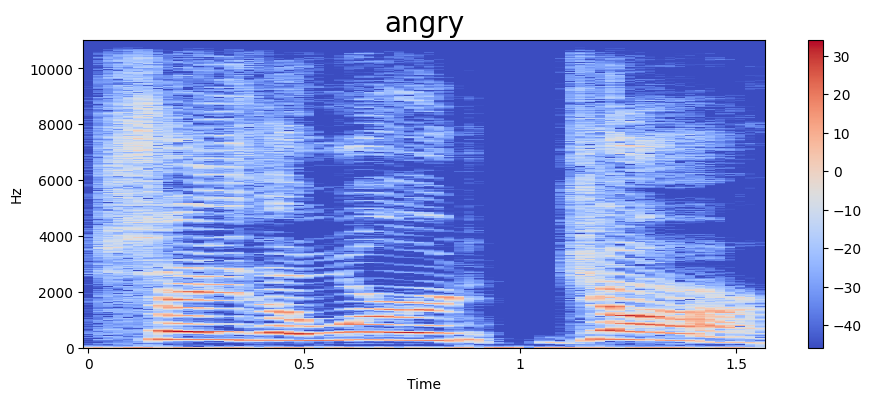

In [11]:
emotion='angry'
path=np.array (df['speech'][df['label']==emotion])[1]
data,sr = librosa.load(path)
waveplot(data,sr,emotion)
spectogram(data,sr,emotion)
Audio(path)

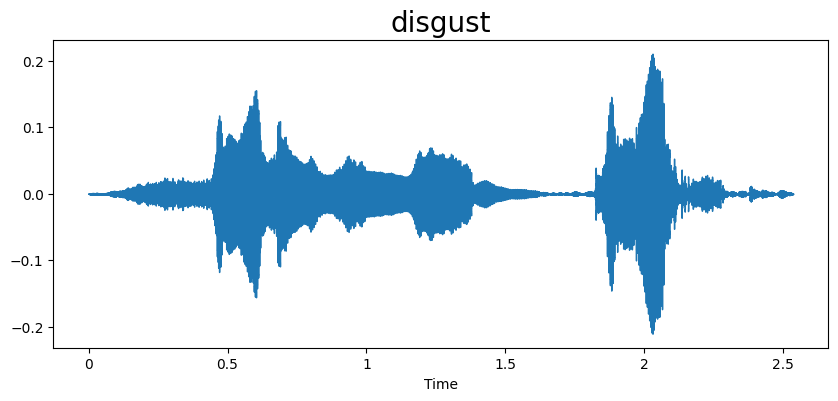

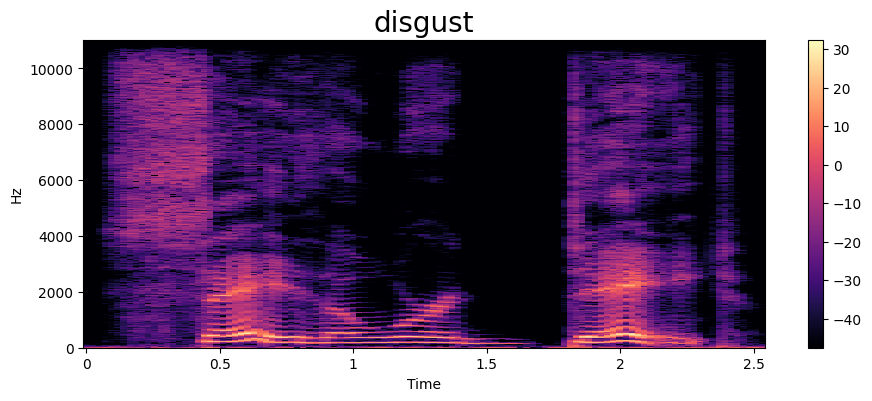

In [12]:
emotion='disgust'
path=np.array (df['speech'][df['label']==emotion])[0]
data,sr = librosa.load(path)
waveplot(data,sr,emotion)
spectogram(data,sr,emotion)
Audio(path)

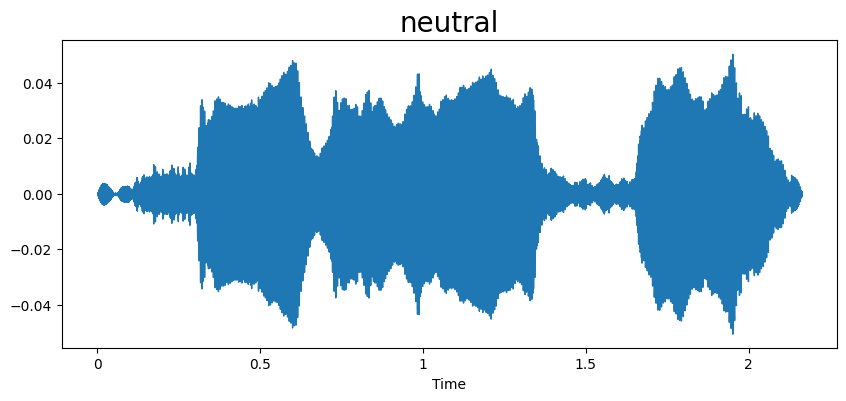

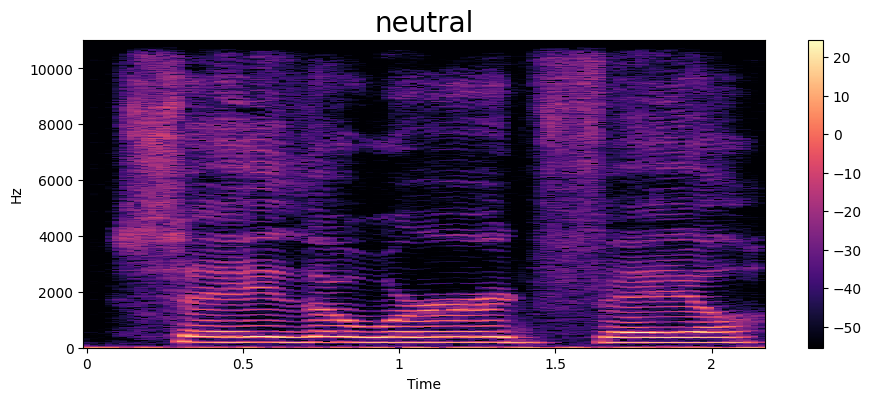

In [13]:
emotion='neutral'
path=np.array (df['speech'][df['label']==emotion])[0]
data,sr = librosa.load(path)
waveplot(data,sr,emotion)
spectogram(data,sr,emotion)
Audio(path)

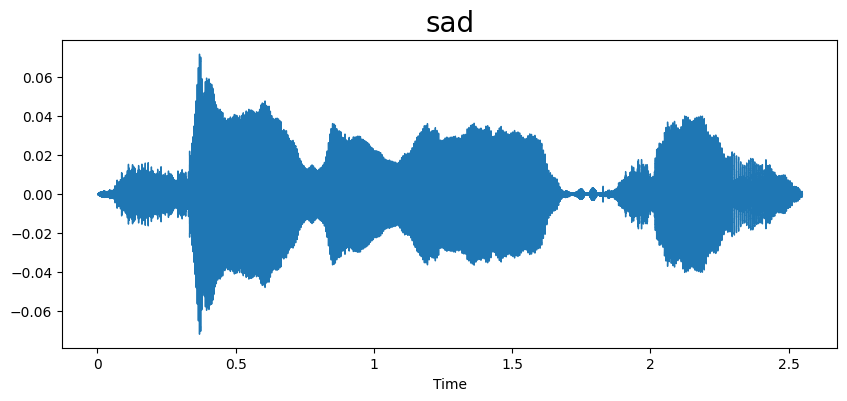

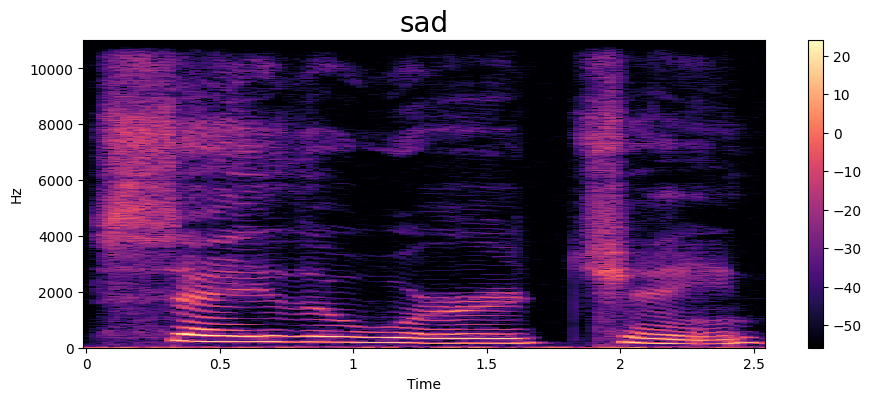

In [14]:
emotion='sad'
path=np.array (df['speech'][df['label']==emotion])[0]
data,sr = librosa.load(path)
waveplot(data,sr,emotion)
spectogram(data,sr,emotion)
Audio(path)

In [15]:
emotion='ps'
path=np.array (df['speech'][df['label']==emotion])[0]
data,sr = librosa.load(path)
waveplot(data,sr,emotion)
spectogram(data,sr,emotion)
Audio(path)

IndexError: index 0 is out of bounds for axis 0 with size 0

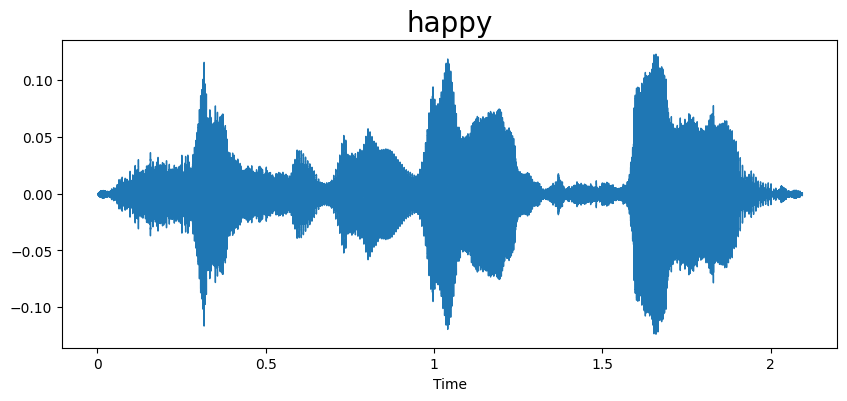

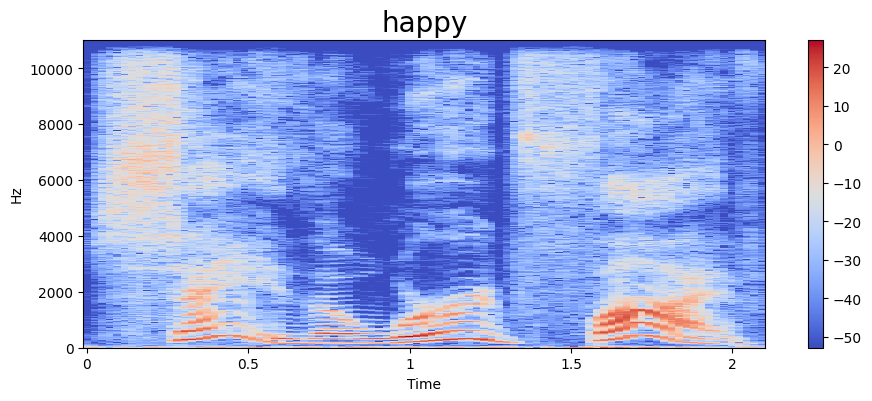

In [ ]:
emotion='happy'
path=np.array (df['speech'][df['label']==emotion])[0]
data,sr = librosa.load(path)
waveplot(data,sr,emotion)
spectogram(data,sr,emotion)
Audio(path)

## Feature Extraction

In [ ]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc =np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-3.7918195e+02,  7.7709236e+01, -1.0372033e+01, -5.4537764e+00,
        1.3184547e+00, -7.7290649e+00, -2.1778973e+01, -7.2411752e+00,
       -1.1051054e+01, -1.8976500e+00, -1.2775905e+01,  4.6129009e-01,
       -2.9768314e+00,  3.3241763e+00, -5.8528481e+00, -1.2236860e+00,
       -5.2717257e+00, -1.3951776e+00, -6.7198434e+00, -1.3947016e+01,
       -2.3938198e+00,  6.2359052e+00,  6.4110298e+00,  2.1544685e+01,
        2.0417532e+01,  2.3756897e+01,  1.0856838e+01,  1.0062340e+01,
        1.5517366e+00,  6.1197357e+00,  1.0175385e+01,  9.5421505e+00,
        3.2234607e+00, -3.6885914e-01,  5.2179017e+00,  5.7261267e+00,
        1.9438082e+00,  3.1398737e+00,  1.8118906e-01,  3.8679309e+00],
      dtype=float32)

In [ ]:
x_mfcc=df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
df

,speech,label
0,/MainProject2.0/data/TESS Toronto emotional sp...,angry
1,/MainProject2.0/data/TESS Toronto emotional sp...,angry
2,/MainProject2.0/data/TESS Toronto emotional sp...,angry
3,/MainProject2.0/data/TESS Toronto emotional sp...,angry
4,/MainProject2.0/data/TESS Toronto emotional sp...,angry
...,...,...
2558,/MainProject2.0/data/TESS Toronto emotional sp...,sad
2559,/MainProject2.0/data/TESS Toronto emotional sp...,sad
2560,/MainProject2.0/data/TESS Toronto emotional sp...,sad
2561,/MainProject2.0/data/TESS Toronto emotional sp...,sad


In [ ]:
x_mfcc

0       [-379.18195, 77.709236, -10.372033, -5.4537764...
1       [-417.96854, 94.746475, -9.453185, -22.79414, ...
2       [-411.6394, 78.45155, -1.6218046, -1.4667368, ...
3       [-418.01657, 68.694244, -5.312053, 2.1744826, ...
4       [-467.83038, 92.1703, 5.889148, -9.331057, -4....
                              ...                        
2558    [-406.48053, 80.379875, 32.462395, 46.579094, ...
2559    [-426.90918, 102.54757, 24.800041, 43.048096, ...
2560    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
2561    [-434.8618, 89.906364, 28.373262, 39.57707, -2...
2562    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 2563, dtype: object

In [ ]:
x=[x for x in x_mfcc]
x=np.array(x)
x.shape

(2563, 40)

In [ ]:
#input split
X=np.expand_dims(x,-1)
X.shape

(2563, 40, 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [ ]:
y=y.toarray()

In [ ]:
y.shape

(2563, 7)

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, random_state=10, test_size=0.2)
xTrain.shape, yTrain.shape, xTest.shape, yTest.shape

((2050, 40, 1), (2050, 7), (513, 40, 1), (513, 7))

## Create The LSTM model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

model=Sequential([
    LSTM(123,return_sequences=False, input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71747 (280.26 KB)
Trainable params: 71747 

In [ ]:
#train the Model
history=model.fit(xTrain,yTrain,validation_split=0.2,epochs=18,batch_size=512,shuffle=True)

Epoch 1/18
4/4 [==============================] - 3s 273ms/step - loss: 1.9517 - accuracy: 0.1921 - val_loss: 1.8480 - val_accuracy: 0.4146
Epoch 2/18
4/4 [==============================] - 0s 113ms/step - loss: 1.8454 - accuracy: 0.3329 - val_loss: 1.7393 - val_accuracy: 0.4780
Epoch 3/18
4/4 [==============================] - 0s 117ms/step - loss: 1.7444 - accuracy: 0.4311 - val_loss: 1.6079 - val_accuracy: 0.5756
Epoch 4/18
4/4 [==============================] - 0s 115ms/step - loss: 1.6222 - accuracy: 0.4927 - val_loss: 1.4407 - val_accuracy: 0.5854
Epoch 5/18
4/4 [==============================] - 0s 114ms/step - loss: 1.4658 - accuracy: 0.5293 - val_loss: 1.2121 - val_accuracy: 0.6707
Epoch 6/18
4/4 [==============================] - 0s 111ms/step - loss: 1.2704 - accuracy: 0.5738 - val_loss: 1.0014 - val_accuracy: 0.6829
Epoch 7/18
4/4 [==============================] - 0s 116ms/step - loss: 1.0979 - accuracy: 0.6037 - val_loss: 0.8720 - val_accuracy: 0.7415
Epoch 8/18
4/4 [====

In [ ]:
testLoss, testAcc = model.evaluate(xTest, yTest)
print(f'Test accuracy: {testAcc*100:.2f}%')

17/17 [==============================] - 0s 8ms/step - loss: 0.1955 - accuracy: 0.9513
Test accuracy: 95.13%


## Plot The Results

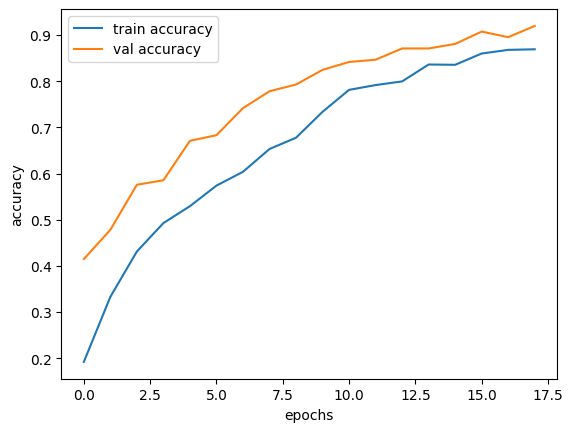

In [ ]:
epochs=list(range(18))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()



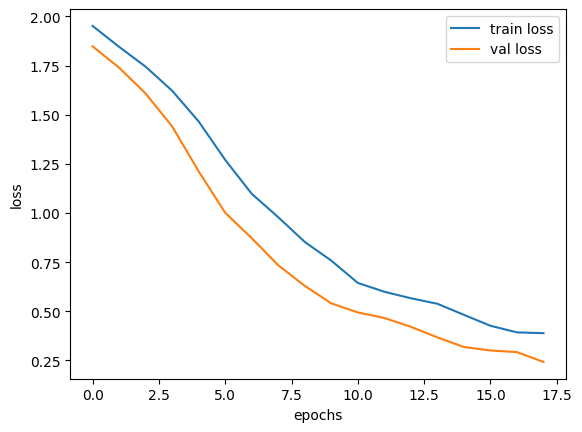

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,label='train loss')
plt.plot(epochs,val_loss,label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# Predict on the test data
predTest = model.predict(xTest)
yPred = enc.inverse_transform(predTest)
yTest = enc.inverse_transform(yTest)

17/17 [==============================] - 0s 6ms/step


In [ ]:
# Create a DataFrame to compare predicted and actual labels
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = yPred.flatten()
df['Actual Labels'] = yTest.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,neutral,neutral
1,ps,ps
2,neutral,neutral
3,disgust,happy
4,fear,fear
5,happy,happy
6,sad,sad
7,fear,fear
8,sad,sad
9,angry,angry


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Print classification report
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

       angry       0.92      0.91      0.91        64
     disgust       0.95      0.95      0.95        76
        fear       0.97      0.99      0.98        78
       happy       0.95      0.90      0.93        70
     neutral       1.00      1.00      1.00        66
          ps       0.93      0.97      0.95        86
         sad       0.93      0.95      0.94        73

    accuracy                           0.95       513
   macro avg       0.95      0.95      0.95       513
weighted avg       0.95      0.95      0.95       513



In [ ]:
conf_matrix = confusion_matrix(yTest, yPred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[58  0  0  2  0  2  2]
 [ 0 72  0  0  0  1  3]
 [ 1  0 77  0  0  0  0]
 [ 1  1  2 63  0  3  0]
 [ 0  0  0  0 66  0  0]
 [ 2  0  0  1  0 83  0]
 [ 1  3  0  0  0  0 69]]


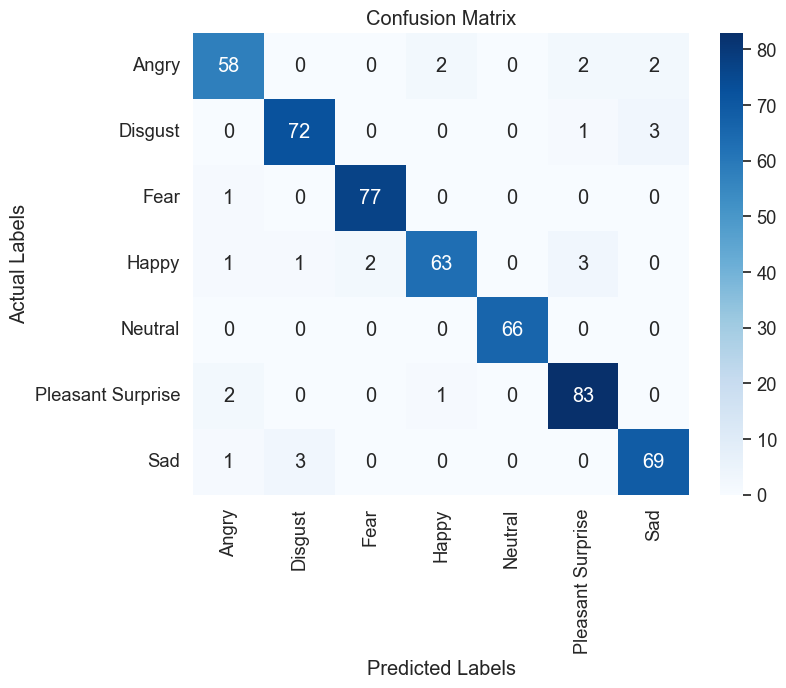

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming yPred and yTest are your predicted and actual labels
conf_matrix = confusion_matrix(yTest, yPred)

# Define the class labels (if applicable)
class_labels = ["Angry","Disgust","Fear","Happy","Neutral","Pleasant Surprise","Sad"]  # Add your class labels here

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('ser.pkl','wb'))


In [ ]:
model.predict([xTest[0]])


2/2 [==============================] - 0s 8ms/step


array([[0.13331498, 0.05454832, 0.27320206, 0.2929454 , 0.0802019 ,
        0.05571079, 0.11007655],
       [0.02814007, 0.0369611 , 0.04627579, 0.05989453, 0.6028667 ,
        0.16584799, 0.06001385],
       [0.10517574, 0.20650142, 0.12659322, 0.13139068, 0.10121595,
        0.15710662, 0.17201641],
       [0.03547906, 0.05337168, 0.0537014 , 0.07201549, 0.50392425,
        0.2024565 , 0.07905156],
       [0.12734109, 0.16665085, 0.14276332, 0.1398823 , 0.1215665 ,
        0.15788612, 0.14390992],
       [0.12115055, 0.11807931, 0.230466  , 0.17198867, 0.11680721,
        0.12151574, 0.11999257],
       [0.0909922 , 0.0780554 , 0.41262928, 0.18484238, 0.07729715,
        0.06897168, 0.08721182],
       [0.07357244, 0.06176272, 0.49372122, 0.17399897, 0.06887632,
        0.05151649, 0.07655183],
       [0.11350708, 0.10634634, 0.28171536, 0.17946857, 0.10351503,
        0.10483762, 0.11060996],
       [0.11521709, 0.19125192, 0.13353981, 0.13544412, 0.10807239,
        0.15546338, 0.1

In [ ]:
y[0]

array([1., 0., 0., 0., 0., 0., 0.])